In [60]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# 1

a)

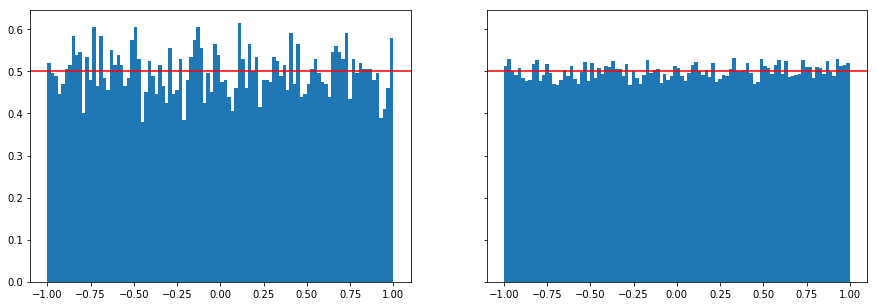

In [61]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

for i, samples_count in enumerate((10_000, 100_000)):
    ax = axes[i]
    samples = np.random.uniform(-1, 1, samples_count)
    ax.hist(samples, bins=100, density=1)
    ax.axhline(y=0.5, color='r')

b)

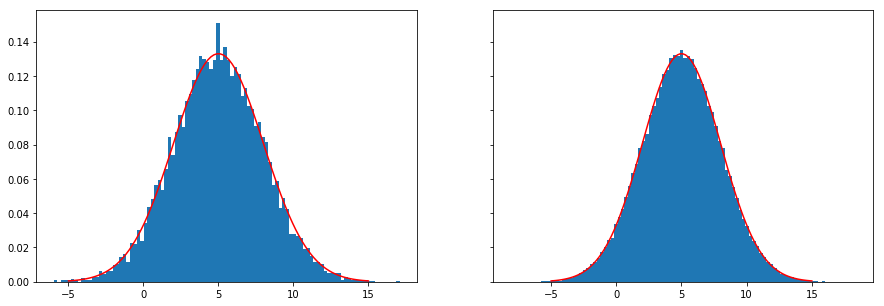

In [62]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

for i, samples_count in enumerate((10_000, 100_000)):
    ax = axes[i]
    samples = np.random.normal(5, 3, samples_count)
    ax.hist(samples, bins=100, density=1)
    x = np.linspace(-5, 15, 100)
    ax.plot(x, scipy.stats.norm.pdf(x, 5, 3), color='r');

c)

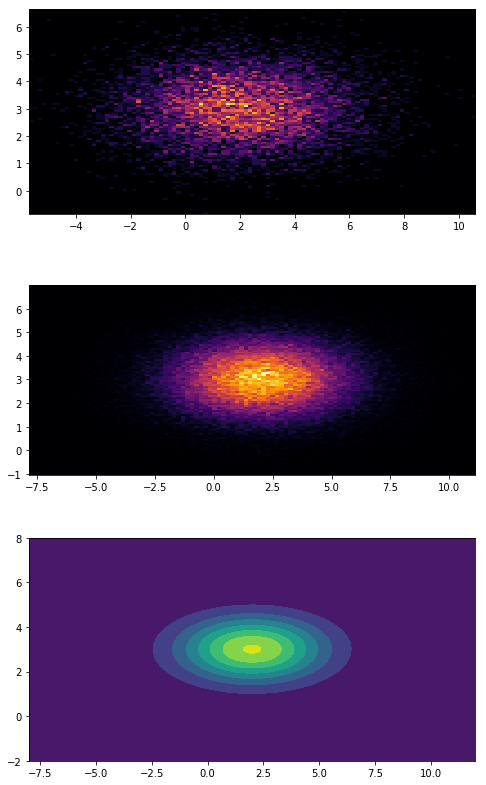

In [63]:
_, axes = plt.subplots(3, 1, figsize=(8, 14))

for i, samples_count in enumerate((10_000, 100_000)):
    ax = axes[i]
    ax.set_aspect('equal')
    samples = np.random.multivariate_normal([2, 3], np.diag([5, 1]), samples_count)
    ax.hist2d(samples[:, 0], samples[:, 1], bins=100, cmap='inferno')

x, y = np.meshgrid(np.linspace(-8, 12, 100), np.linspace(-2, 8, 100))
axes[2].set_aspect('equal')
axes[2].contourf(x, y, scipy.stats.multivariate_normal.pdf(np.dstack((x, y)), [2, 3], np.diag([5, 1])));

d)

In [64]:
x, y = samples[:, 0], samples[:, 1]
np.sum(x < y) / 100_000

0.65884

$P(X<Y) = P(Y-X>0) = P(Z>0) \qquad Z = Y - X$

$Z \sim N(3, 6)$

$P(Z>0) = 0,69...$

# 2

a)

In [65]:
d = 100
samples = np.random.randint(20, size=(d, 3))
x, y, w = np.hsplit(samples, 3)

x_len = np.sqrt(x.T.dot(x)[0, 0])
x_w_mean = x.T.dot(w)[0, 0]
x_y_dist = np.sqrt((x - y).T.dot(x - y)[0, 0])
x_y_prod = x.T.dot(y)[0, 0]
x_len, x_w_mean, x_y_dist, x_y_prod

(118.78131166138888, 9373, 76.2102355330306, 11598)

b)

In [66]:
d, N = 100, 1000
X = np.random.randint(20, size=(d, N))
y, w = np.hsplit(np.random.randint(20, size=(d, 2)), 2)

X_lens = np.sqrt((X ** 2).sum(axis=0))
X_w_means = w.T.dot(X)
X_y_dists = np.sqrt(((X - y) ** 2).sum(axis=0))
X_y_prods = y.T.dot(X)

# 3

a)

In [67]:
from sklearn import datasets
iris = datasets.load_iris()

b)

In [68]:
x_name = 'sepal length (cm)'
y_name = 'sepal width (cm)'

def get_iris_plt():
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title('Iris')
    return fig, ax

x_col_ind = iris.feature_names.index(x_name)
y_col_ind = iris.feature_names.index(y_name)

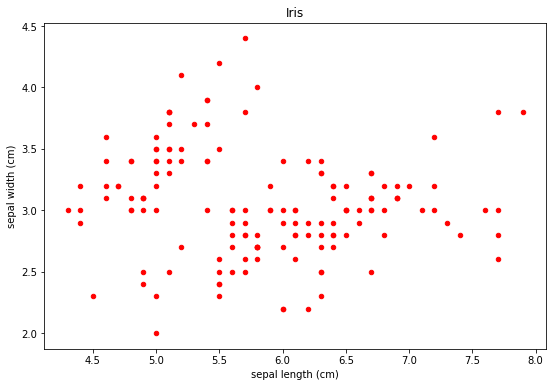

In [69]:
x = iris.data[:, x_col_ind]
y = iris.data[:, y_col_ind]

fig, ax = get_iris_plt()
ax.scatter(x, y, color='r', s=20);

c)

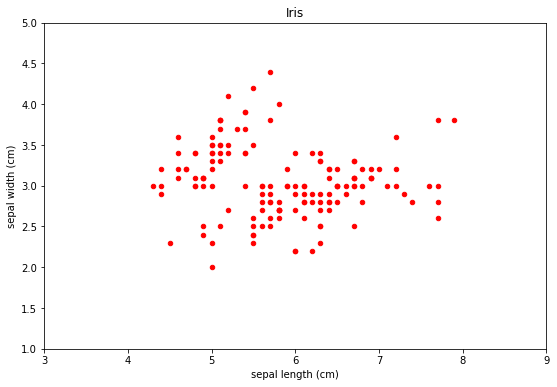

In [70]:
ax.set_xlim(3, 9)
ax.set_ylim(1, 5)
fig

d)

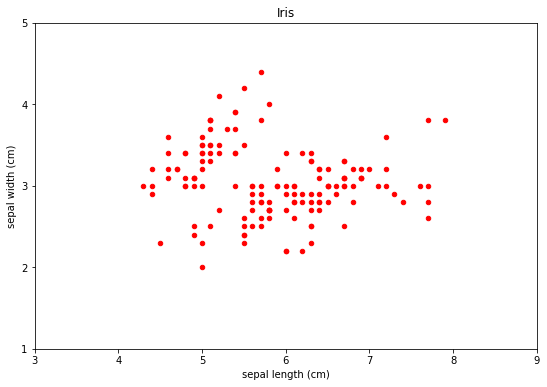

In [71]:
from matplotlib import ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
fig

e)

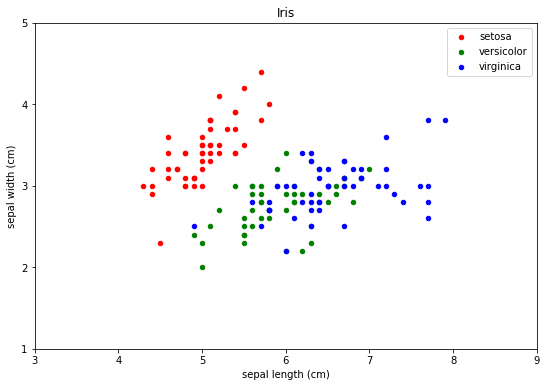

In [72]:
for artist in ax.lines + ax.collections:
    artist.remove()

for target, color in zip(iris.target_names, ('r', 'g', 'b')):
    rows = iris.data[iris.target == np.where(iris.target_names == target)[0]]
    x = rows[:, x_col_ind]
    y = rows[:, y_col_ind]
    ax.scatter(x, y, color=color, s=20, label=target)

ax.legend()
fig

f)

In [73]:
fig.savefig('zadanie1.png')

# 4

a)

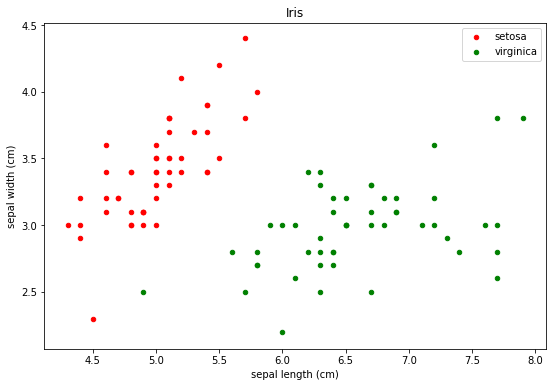

In [74]:
fig, ax = get_iris_plt()
for target, color in zip(('setosa', 'virginica'), ('r', 'g')):
    rows = iris.data[iris.target == np.where(iris.target_names == target)[0]]
    x = rows[:, x_col_ind]
    y = rows[:, y_col_ind]
    ax.scatter(x, y, color=color, s=20, label=target)

ax.legend();

b)

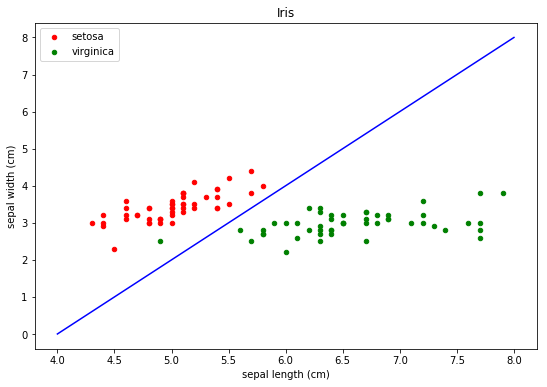

In [75]:
f = lambda x: 2*x - 8
xs = [4, 8]
ax.plot(xs, [f(x) for x in xs], color='b')
fig

c)

In [76]:
def split_iris(f):
    fig, ax = get_iris_plt()
    xs = [4, 8]
    ax.plot(xs, [f(x) for x in xs], color='b')

    setosa_row_inds = np.where(iris.target == np.where(iris.target_names == 'setosa')[0])[0]
    setosa_rows = iris.data[setosa_row_inds, :]
    setosa_ok_rows = setosa_rows[np.where(setosa_rows[:, y_col_ind] >= f(setosa_rows[:, x_col_ind]))[0]]
    setosa_bad_rows = setosa_rows[np.where(setosa_rows[:, y_col_ind] < f(setosa_rows[:, x_col_ind]))[0]]

    virginica_row_inds = np.where(iris.target == np.where(iris.target_names == 'virginica')[0])[0]
    virginica_rows = iris.data[virginica_row_inds, :]
    virginica_ok_rows = virginica_rows[
        np.where(virginica_rows[:, y_col_ind] <= f(virginica_rows[:, x_col_ind]))[0]]
    virginica_bad_rows = virginica_rows[
        np.where(virginica_rows[:, y_col_ind] > f(virginica_rows[:, x_col_ind]))[0]]

    ok_rows = np.concatenate((setosa_ok_rows, virginica_ok_rows))
    ok_x = ok_rows[:, x_col_ind]
    ok_y = ok_rows[:, y_col_ind]
    ax.scatter(ok_x, ok_y, color='g', s=20)

    bad_rows = np.concatenate((setosa_bad_rows, virginica_bad_rows))
    bad_x = bad_rows[:, x_col_ind]
    bad_y = bad_rows[:, y_col_ind]
    ax.scatter(bad_x, bad_y, color='r', s=20)
    return fig

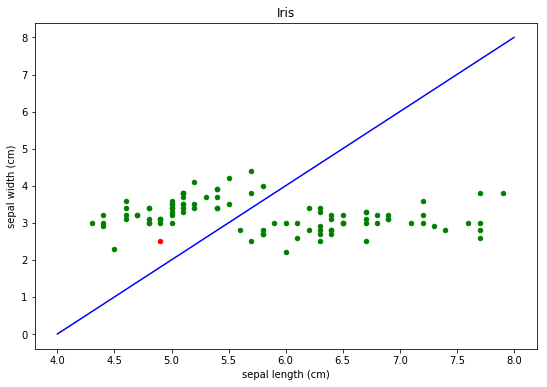

In [77]:
fig = split_iris(lambda x: 2*x - 8)

d)

In [78]:
fig.savefig('zadanie4a.png')

e)

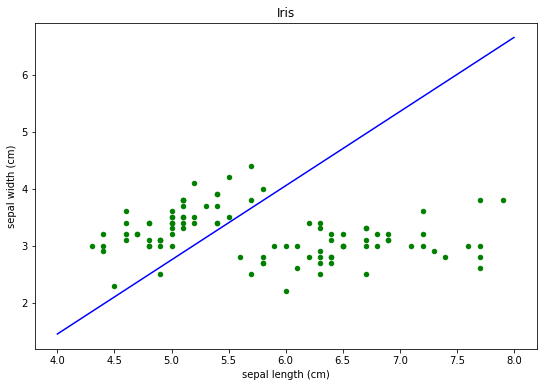

In [79]:
fig = split_iris(lambda x: 1.3*x - 3.75)

f)

In [80]:
fig.savefig('zadanie4b.png')

# 5

a)

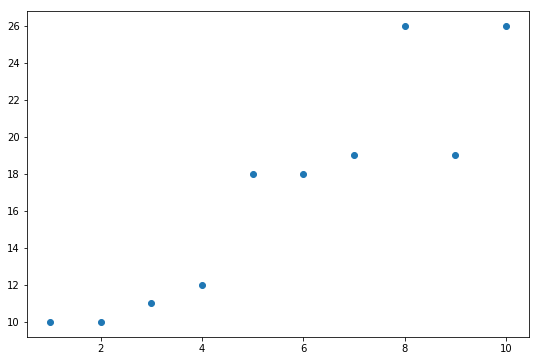

In [81]:
x = np.arange(1, 11)
y = np.array([10, 10, 11, 12, 18, 18, 19, 26, 19, 26])

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(x, y);

b)

$y=2x+5$

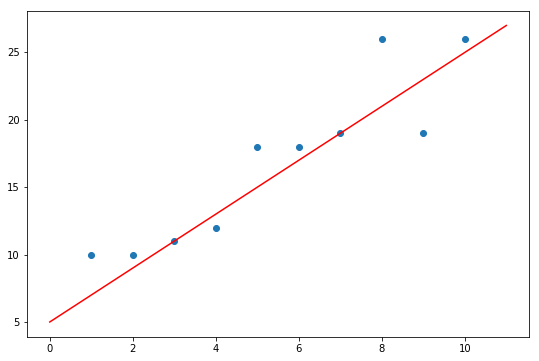

In [82]:
f = lambda x: 2*x + 5
xs = [0, 11]
ax.plot(xs, [f(x) for x in xs], color='r')
fig

c)

In [83]:
fig.savefig('zadanie3a.png')

d)

$$dist = \frac{|ax+by+c|}{\sqrt{a^2+b^2}}$$

In [84]:
a, b, c = 2, -1, 5
dists = np.absolute(a*x + b*y + c) / np.sqrt(a ** 2 + b ** 2)
dists

array([1.34164079, 0.4472136 , 0.        , 0.4472136 , 1.34164079,
       0.4472136 , 0.        , 2.23606798, 1.78885438, 0.4472136 ])

e)

Linear regression

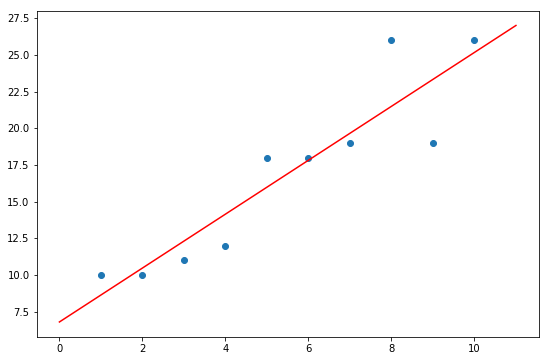

In [85]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(x, y)

x_ = np.stack((np.ones(x.shape), x))
b, a = np.linalg.inv(x_.dot(x_.T)).dot(x_).dot(y.T)
ax.plot(xs, [a*x + b for x in xs], color='r');

f)

In [86]:
fig.savefig('zadanie3b.png')

# 6

In [87]:
n = 1000

def gen_clouds(k, d):
    clouds, centers = [], []
    for i in range(k):
        rad = d / (2 * np.sin(np.pi / k))
        a = rad * np.sin(i/k * 2*np.pi)
        b = rad * np.cos(i/k * 2*np.pi)
        x = np.random.normal(a, 1, n)
        y = np.random.normal(b, 1, n)
        clouds.append((x, y))
        centers.append((a, b))
    return clouds, centers

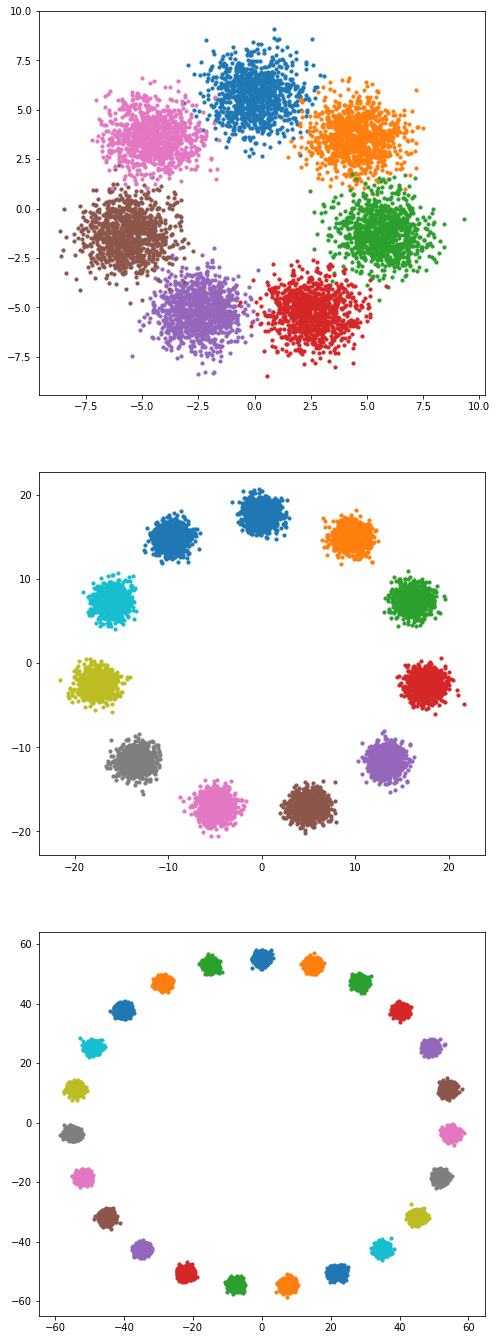

In [88]:
fig, axes = plt.subplots(3, 1, figsize=(8, 24))
ks, ds = (7, 11, 23), (5, 10, 15)
for ax, k, d in zip(axes, ks, ds):
    clouds, _ = gen_clouds(k, d)
    for x, y in clouds:
        ax.scatter(x, y, s=10)

# 7

for k=7, d=3 bad points ratio is 13.26%
for k=7, d=5 bad points ratio is 1.19%
for k=11, d=10 bad points ratio is 0.00%


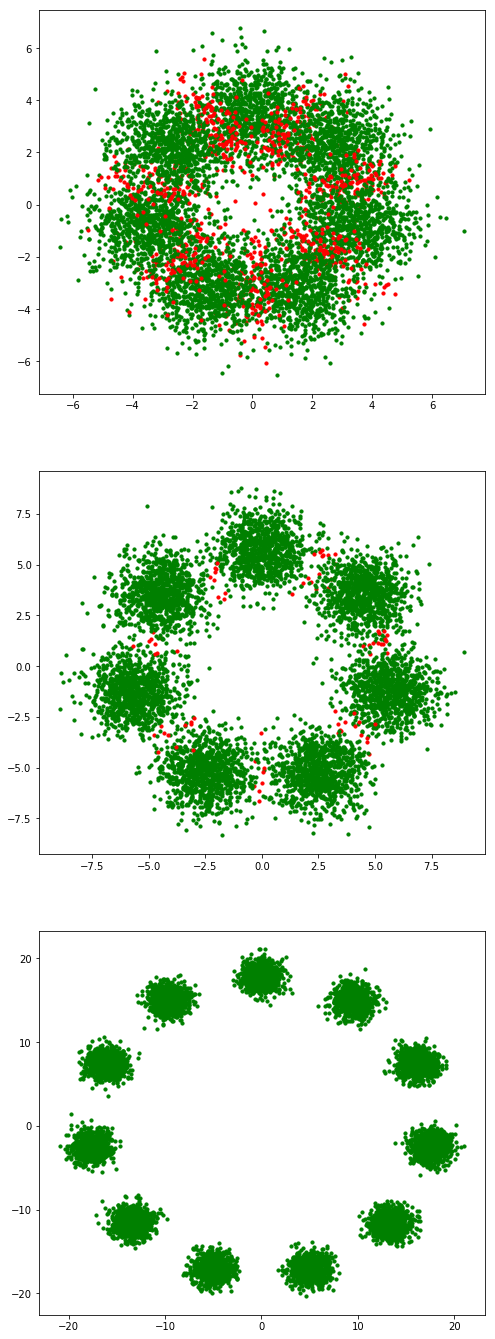

In [89]:
fig, axes = plt.subplots(3, 1, figsize=(8, 24))
ks, ds = (7, 7, 11), (3, 5, 10)
for ax, k, d in zip(axes, ks, ds):
    clouds, centers_ = gen_clouds(k, d)
    bad_points_count = 0
    centers = np.array(list(zip(*centers_))).T
    a, b = np.hsplit(centers, 2)
    for i, (x, y) in enumerate(clouds):
        dists = a ** 2 + x ** 2
        dists += b ** 2 + y ** 2
        dists -= 2 * centers.dot(np.stack((x, y)))
        nearest_centres = np.argmin(dists, axis=0)
        bad_points_count += np.sum(nearest_centres != i)
        
        ok_x = x[nearest_centres == i]
        ok_y = y[nearest_centres == i]
        ax.scatter(ok_x, ok_y, color='g', s=10)
        
        bad_x = x[nearest_centres != i]
        bad_y = y[nearest_centres != i]
        ax.scatter(bad_x, bad_y, color='r', s=10)
    
    bad_points_ratio = bad_points_count / (k * n)
    print(f'for k={k}, d={d} bad points ratio is {bad_points_ratio * 100:.2f}%')